In [1]:
import pandas as pd

## SVM and Boosting Trees

In [2]:
results = \
"""val R2 0.2370352295509844 0.004864897661955212
val Spear 0.4932619593352429 0.01432980534441483
test R2 0.17143226478348375 0.006290679844989228
test Spear 0.4527530524666828 0.004408367459766309

val R2 0.2761292458780706 0.02186719187641223
val Spear 0.4843307636504904 0.0333374209706798
test R2 0.17240154350005946 0.002411191048605907
test Spear 0.45891524869772354 0.0013972159101678335

val R2 0.2277599554734043 0.05540620479967322
val Spear 0.45508214673704256 0.04482903657423826
test R2 0.025555430013379062 0.00773491235484139
test Spear 0.10568538198923554 0.014788801436152032

val R2 0.2726274644443823 0.06460262039684045
val Spear 0.4303426820056275 0.022202853109618698
test R2 0.024131333158824746 0.0024849659802318224
test Spear 0.13660704165569318 0.015347045715059095

val R2 0.15687447102446284 0.05120361637727491
val Spear 0.3712164342800531 0.011225365452072983
test R2 0.15135112725670463 0.0028435251519886356
test Spear 0.308100835071679 0.002555561622346465

val R2 0.2937267014580645 0.05625799071479229
val Spear 0.47437323994331154 0.010332947860721316
test R2 0.21188338021130979 0.008242252557436939
test Spear 0.36990030536336316 0.022811765086414196

val R2 0.14213931806598878 0.02021737627794062
val Spear 0.3725804722605914 0.007136353635589427
test R2 0.1885035935984798 0.0033713047513444384
test Spear 0.34449785924288107 0.0021887385140420125

val R2 0.30983919988222214 0.013704751166545315
val Spear 0.5071294111511242 0.007686993828352864
test R2 0.38317577942456876 0.016551522027221773
test Spear 0.40563156767350317 0.015099429620042964

val R2 0.15306851234181687 0.012862172307966782
val Spear 0.4208073444887846 0.009056934300789557
test R2 0.005022809695337565 0.0009581576629098544
test Spear 0.10409909151163156 0.004002457198152873

val R2 0.31098213131066216 0.005932088544277264
val Spear 0.5797525329527266 0.010465217950405982
test R2 0.000519547238353456 0.0006411019457136357
test Spear 0.04364820712863555 0.000945152142126725

val R2 0.22144186449256154 0.040409993857638694
val Spear 0.4398062851576692 0.02418015182710733
test R2 0.1669889215856694 0.005142345821065832
test Spear 0.33320473422337327 0.0016895052056015946

val R2 0.31972088159892426 0.08359629814948578
val Spear 0.47500654202940473 0.041825293802971515
test R2 0.18385353107878677 0.010574875021192177
test Spear 0.36152551120849435 0.0016098157523196878"""

In [3]:
splitted_res = results.split("\n\n")

In [4]:
res_df = pd.DataFrame(columns=["task", "model", "split", "metric", "mean", "std"])

In [5]:
for i, task in enumerate(["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]):
    task_res_SVM = splitted_res[2*i]
    task_res_Tree = splitted_res[2*i + 1]
    
    for model, task_res in zip(["SVM", "Tree"], [task_res_SVM, task_res_Tree]):
        task_res_splitted = task_res.split("\n")
        for single_res in task_res_splitted:
            single_res_splitted = single_res.split(" ")
            res_df.loc[len(res_df)] = [task, model, single_res_splitted[0], single_res_splitted[1], 
                   single_res_splitted[2], single_res_splitted[3]]

## Deep Synergy

In [6]:
deep_syn_res ="""R2 0.144 \pm 0.025
spearman 0.454 \pm 0.008

R2 0.329 \pm 0.034
spearman 0.453 \pm 0.011

R2 0.059 \pm 0.003
spearman 0.176 \pm 0.003

R2 0.356 \pm 0.111
spearman 0.401 \pm 0.032

R2 0.305 \pm 0.012
spearman 0.43 \pm 0.005

R2 0.393 \pm 0.015
spearman 0.52 \pm 0.006

R2 0.399 \pm 0.01
spearman 0.389 \pm 0.036

R2 0.366 \pm 0.011
spearman 0.35 \pm 0.045

R2 0.004 \pm 0.002
spearman 0.096 \pm 0.026

R2 0.378 \pm 0.021
spearman 0.64 \pm 0.009

R2 0.17 \pm 0.012
spearman 0.302 \pm 0.018

R2 0.283 \pm 0.079
spearman 0.424 \pm 0.056
"""

In [7]:
deep_syn_res_splitted = deep_syn_res.split("\n\n")

tasks = ["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]
splits = ["test", "val"]

for i, single_res in enumerate(deep_syn_res_splitted):
    single_res_splitted = single_res.split(' ')
    
    r2_res = [tasks[i // 2], "deep syn", splits[i % 2], "R2", 
              single_res_splitted[1], single_res_splitted[3].split("\n")[0]]
    spear_res = [tasks[i // 2], "deep syn", splits[i % 2], "Spear", 
                 single_res_splitted[4], single_res_splitted[6].split("\n")[0]]
    
    res_df.loc[len(res_df)] = r2_res
    res_df.loc[len(res_df)] = spear_res

## No permut invariance

In [8]:
no_permut_res="""R2 0.208 \pm 0.001
spearman 0.437 \pm 0.003

R2 0.332 \pm 0.074
spearman 0.457 \pm 0.036

R2 0.043 \pm 0.005
spearman 0.145 \pm 0.023

R2 0.33 \pm 0.123
spearman 0.455 \pm 0.073

R2 0.206 \pm 0.037
spearman 0.458 \pm 0.011

R2 0.361 \pm 0.057
spearman 0.504 \pm 0.007

R2 0.38 \pm 0.025
spearman 0.386 \pm 0.031

R2 0.301 \pm 0.017
spearman 0.294 \pm 0.023

R2 0.001 \pm 0.001
spearman 0.044 \pm 0.021

R2 0.358 \pm 0.032
spearman 0.625 \pm 0.008

R2 0.195 \pm 0.008
spearman 0.329 \pm 0.006

R2 0.275 \pm 0.064
spearman 0.471 \pm 0.051
"""

In [9]:
no_permut_res_splitted = no_permut_res.split("\n\n")

tasks = ["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]
splits = ["test", "val"]

for i, single_res in enumerate(no_permut_res_splitted):
    single_res_splitted = single_res.split(' ')
    
    r2_res = [tasks[i // 2], "no permut", splits[i % 2], "R2", 
              single_res_splitted[1], single_res_splitted[3].split("\n")[0]]
    spear_res = [tasks[i // 2], "no permut", splits[i % 2], "Spear", 
                 single_res_splitted[4], single_res_splitted[6].split("\n")[0]]
    
    res_df.loc[len(res_df)] = r2_res
    res_df.loc[len(res_df)] = spear_res

## Recover

In [10]:
recover_res ="""R2 0.242 \pm 0.006
spearman 0.466 \pm 0.007

R2 0.343 \pm 0.053
spearman 0.474 \pm 0.021

R2 0.038 \pm 0.002
spearman 0.157 \pm 0.012

R2 0.401 \pm 0.147
spearman 0.459 \pm 0.069

R2 0.282 \pm 0.017
spearman 0.448 \pm 0.021

R2 0.387 \pm 0.032
spearman 0.518 \pm 0.021

R2 0.382 \pm 0.017
spearman 0.378 \pm 0.015

R2 0.278 \pm 0.027
spearman 0.299 \pm 0.047

R2 0.014 \pm 0.016
spearman 0.147 \pm 0.075

R2 0.304 \pm 0.021
spearman 0.589 \pm 0.032

R2 0.196 \pm 0.008
spearman 0.326 \pm 0.025

R2 0.275 \pm 0.067
spearman 0.433 \pm 0.023
"""

In [11]:
recover_res_splitted = recover_res.split("\n\n")

tasks = ["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]
splits = ["test", "val"]

for i, single_res in enumerate(recover_res_splitted):
    single_res_splitted = single_res.split(' ')
    
    r2_res = [tasks[i // 2], "recover", splits[i % 2], "R2", 
              single_res_splitted[1], single_res_splitted[3].split("\n")[0]]
    spear_res = [tasks[i // 2], "recover", splits[i % 2], "Spear", 
                 single_res_splitted[4], single_res_splitted[6].split("\n")[0]]
    
    res_df.loc[len(res_df)] = r2_res
    res_df.loc[len(res_df)] = spear_res

## Shuffled

In [12]:
shuffled_res ="""R2 0.237 \pm 0.014
spearman 0.449 \pm 0.016

R2 0.325 \pm 0.058
spearman 0.46 \pm 0.009

R2 0.003 \pm 0.003
spearman -0.05 \pm 0.04

R2 0.384 \pm 0.161
spearman 0.439 \pm 0.07

R2 0.255 \pm 0.086
spearman 0.42 \pm 0.042

R2 0.391 \pm 0.03
spearman 0.51 \pm 0.019

R2 0.373 \pm 0.013
spearman 0.378 \pm 0.007

R2 0.271 \pm 0.028
spearman 0.268 \pm 0.063

R2 0.011 \pm 0.015
spearman 0.129 \pm 0.067

R2 0.32 \pm 0.02
spearman 0.598 \pm 0.032

R2 0.086 \pm 0.015
spearman 0.228 \pm 0.016

R2 0.298 \pm 0.086
spearman 0.466 \pm 0.053
"""

In [13]:
shuffled_res_splitted = shuffled_res.split("\n\n")

tasks = ["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]
splits = ["test", "val"]

for i, single_res in enumerate(shuffled_res_splitted):
    single_res_splitted = single_res.split(' ')
    
    r2_res = [tasks[i // 2], "shuffled", splits[i % 2], "R2", 
              single_res_splitted[1], single_res_splitted[3].split("\n")[0]]
    spear_res = [tasks[i // 2], "shuffled", splits[i % 2], "Spear", 
                 single_res_splitted[4], single_res_splitted[6].split("\n")[0]]
    
    res_df.loc[len(res_df)] = r2_res
    res_df.loc[len(res_df)] = spear_res

## Plot for latex

In [14]:
res_df

,task,model,split,metric,mean,std
0,pair level,SVM,val,R2,0.2370352295509844,0.004864897661955212
1,pair level,SVM,val,Spear,0.4932619593352429,0.01432980534441483
2,pair level,SVM,test,R2,0.17143226478348375,0.006290679844989228
3,pair level,SVM,test,Spear,0.4527530524666828,0.004408367459766309
4,pair level,Tree,val,R2,0.2761292458780706,0.02186719187641223
...,...,...,...,...,...,...
139,study transfer,shuffled,val,Spear,0.598,0.032
140,one hid drug,shuffled,test,R2,0.086,0.015
141,one hid drug,shuffled,test,Spear,0.228,0.016
142,one hid drug,shuffled,val,R2,0.298,0.086


In [15]:
latex_string = """
"""

In [16]:
for model in ["SVM", "Tree", "deep syn", "no permut", "recover", "shuffled"]:
    for metric in ["R2", "Spear"]:
        for split in ["val", "test"]:
            latex_line = ""
            for task in ["pair level", "drug level", "multi cl", "cl transfer", "study transfer", "one hid drug"]:
                
                latex_line += "&  $"
                
                a = res_df[(res_df["task"] == task) & (res_df["model"] == model) & (res_df["metric"] == metric)
                      & (res_df["split"] == split)]
                latex_line += (str(round(float(a["mean"]), 3)) + " \pm " + str(round(float(a["std"]), 3)))
                
                latex_line += "$    "
                
            print(model, metric, split)
            print(latex_line)

SVM R2 val
&  $0.237 \pm 0.005$    &  $0.228 \pm 0.055$    &  $0.157 \pm 0.051$    &  $0.142 \pm 0.02$    &  $0.153 \pm 0.013$    &  $0.221 \pm 0.04$    
SVM R2 test
&  $0.171 \pm 0.006$    &  $0.026 \pm 0.008$    &  $0.151 \pm 0.003$    &  $0.189 \pm 0.003$    &  $0.005 \pm 0.001$    &  $0.167 \pm 0.005$    
SVM Spear val
&  $0.493 \pm 0.014$    &  $0.455 \pm 0.045$    &  $0.371 \pm 0.011$    &  $0.373 \pm 0.007$    &  $0.421 \pm 0.009$    &  $0.44 \pm 0.024$    
SVM Spear test
&  $0.453 \pm 0.004$    &  $0.106 \pm 0.015$    &  $0.308 \pm 0.003$    &  $0.344 \pm 0.002$    &  $0.104 \pm 0.004$    &  $0.333 \pm 0.002$    
Tree R2 val
&  $0.276 \pm 0.022$    &  $0.273 \pm 0.065$    &  $0.294 \pm 0.056$    &  $0.31 \pm 0.014$    &  $0.311 \pm 0.006$    &  $0.32 \pm 0.084$    
Tree R2 test
&  $0.172 \pm 0.002$    &  $0.024 \pm 0.002$    &  $0.212 \pm 0.008$    &  $0.383 \pm 0.017$    &  $0.001 \pm 0.001$    &  $0.184 \pm 0.011$    
Tree Spear val
&  $0.484 \pm 0.033$    &  $0.43 \pm 0.022$

## Plots

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
res_df_r2_test = res_df[(res_df["metric"] == "R2") & (res_df["split"] == "test")]

In [19]:
svm_means = res_df_r2_test[res_df_r2_test["model"] == "SVM"]["mean"].astype(float).tolist()
boost_tree_means = res_df_r2_test[res_df_r2_test["model"] == "Tree"]["mean"].astype(float).tolist()
deep_syn_means = res_df_r2_test[res_df_r2_test["model"] == "deep syn"]["mean"].astype(float).tolist()
no_permut_means = res_df_r2_test[res_df_r2_test["model"] == "no permut"]["mean"].astype(float).tolist()
recover_means = res_df_r2_test[res_df_r2_test["model"] == "recover"]["mean"].astype(float).tolist()
shuffled_means = res_df_r2_test[res_df_r2_test["model"] == "shuffled"]["mean"].astype(float).tolist()

svm_stds = res_df_r2_test[res_df_r2_test["model"] == "SVM"]["std"].astype(float).tolist()
boost_tree_stds = res_df_r2_test[res_df_r2_test["model"] == "Tree"]["std"].astype(float).tolist()
deep_syn_stds = res_df_r2_test[res_df_r2_test["model"] == "deep syn"]["std"].astype(float).tolist()
no_permut_stds = res_df_r2_test[res_df_r2_test["model"] == "no permut"]["std"].astype(float).tolist()
recover_stds = res_df_r2_test[res_df_r2_test["model"] == "recover"]["std"].astype(float).tolist()
shuffled_stds = res_df_r2_test[res_df_r2_test["model"] == "shuffled"]["std"].astype(float).tolist()

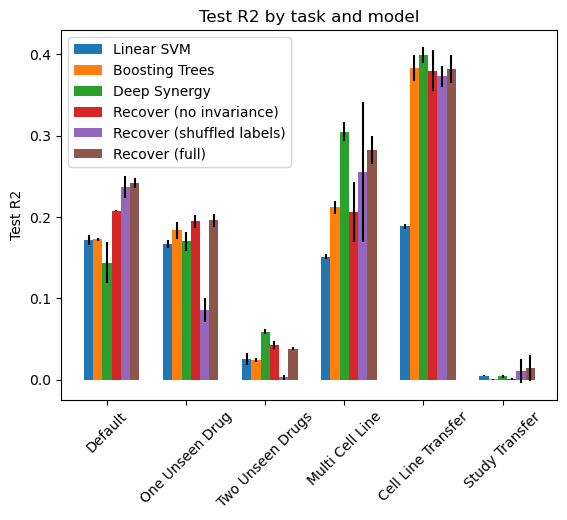

In [20]:
fig, ax = plt.subplots()

width = 0.35  # the width of the bars
labels = ['Default', 'One Unseen Drug', 'Two Unseen Drugs', 'Multi Cell Line', 'Cell Line Transfer', 'Study Transfer']
x = 3*np.arange(len(labels))

rects1 = ax.bar(x - 2*width, np.array(svm_means)[[0, 5, 1, 2, 3, 4]],   
                width, label='Linear SVM', yerr=np.array(svm_stds)[[0, 5, 1, 2, 3, 4]])
rects2 = ax.bar(x - width,   np.array(boost_tree_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Boosting Trees', yerr=np.array(boost_tree_stds)[[0, 5, 1, 2, 3, 4]])
rects3 = ax.bar(x,           np.array(deep_syn_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Deep Synergy', yerr=np.array(deep_syn_stds)[[0, 5, 1, 2, 3, 4]])
rects4 = ax.bar(x + width,   np.array(no_permut_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (no invariance)', yerr=np.array(no_permut_stds)[[0, 5, 1, 2, 3, 4]])
rects5 = ax.bar(x + 2*width, np.array(shuffled_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (shuffled labels)', yerr=np.array(shuffled_stds)[[0, 5, 1, 2, 3, 4]])
rects6 = ax.bar(x + 3*width, np.array(recover_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (full)', yerr=np.array(recover_stds)[[0, 5, 1, 2, 3, 4]])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test R2')
ax.set_title('Test R2 by task and model')
ax.set_xticks(x, labels, rotation=45)
ax.legend()
plt.show()

In [21]:
res_df_spear_test = res_df[(res_df["metric"] == "Spear") & (res_df["split"] == "test")]

In [22]:
svm_means = res_df_spear_test[res_df_spear_test["model"] == "SVM"]["mean"].astype(float).tolist()
boost_tree_means = res_df_spear_test[res_df_spear_test["model"] == "Tree"]["mean"].astype(float).tolist()
deep_syn_means = res_df_spear_test[res_df_spear_test["model"] == "deep syn"]["mean"].astype(float).tolist()
no_permut_means = res_df_spear_test[res_df_spear_test["model"] == "no permut"]["mean"].astype(float).tolist()
recover_means = res_df_spear_test[res_df_spear_test["model"] == "recover"]["mean"].astype(float).tolist()
shuffled_means = res_df_spear_test[res_df_spear_test["model"] == "shuffled"]["mean"].astype(float).tolist()

svm_stds = res_df_spear_test[res_df_spear_test["model"] == "SVM"]["std"].astype(float).tolist()
boost_tree_stds = res_df_spear_test[res_df_spear_test["model"] == "Tree"]["std"].astype(float).tolist()
deep_syn_stds = res_df_spear_test[res_df_spear_test["model"] == "deep syn"]["std"].astype(float).tolist()
no_permut_stds = res_df_spear_test[res_df_spear_test["model"] == "no permut"]["std"].astype(float).tolist()
recover_stds = res_df_spear_test[res_df_spear_test["model"] == "recover"]["std"].astype(float).tolist()
shuffled_stds = res_df_spear_test[res_df_spear_test["model"] == "shuffled"]["std"].astype(float).tolist()

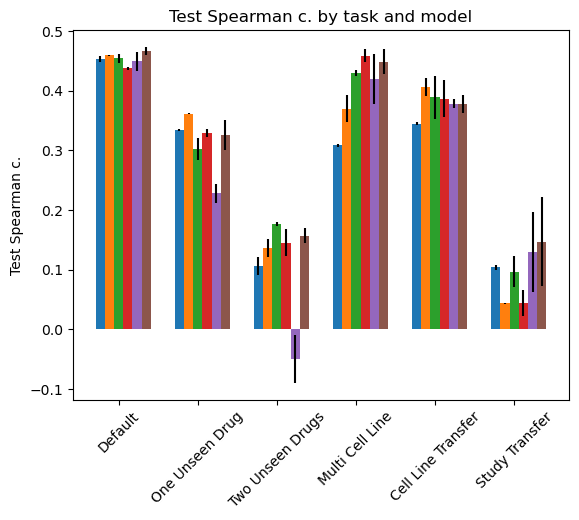

In [23]:
fig, ax = plt.subplots()

width = 0.35  # the width of the bars
labels = ['Default', 'One Unseen Drug', 'Two Unseen Drugs', 'Multi Cell Line', 'Cell Line Transfer', 'Study Transfer']
x = 3*np.arange(len(labels))

rects1 = ax.bar(x - 2*width, np.array(svm_means)[[0, 5, 1, 2, 3, 4]],   
                width, label='Linear SVM', yerr=np.array(svm_stds)[[0, 5, 1, 2, 3, 4]])
rects2 = ax.bar(x - width,   np.array(boost_tree_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Boosting Trees', yerr=np.array(boost_tree_stds)[[0, 5, 1, 2, 3, 4]])
rects3 = ax.bar(x,           np.array(deep_syn_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Deep Synergy', yerr=np.array(deep_syn_stds)[[0, 5, 1, 2, 3, 4]])
rects4 = ax.bar(x + width,   np.array(no_permut_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (no invariance)', yerr=np.array(no_permut_stds)[[0, 5, 1, 2, 3, 4]])
rects5 = ax.bar(x + 2*width, np.array(shuffled_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (shuffled labels)', yerr=np.array(shuffled_stds)[[0, 5, 1, 2, 3, 4]])
rects6 = ax.bar(x + 3*width, np.array(recover_means)[[0, 5, 1, 2, 3, 4]], 
                width, label='Recover (full)', yerr=np.array(recover_stds)[[0, 5, 1, 2, 3, 4]])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Spearman c.')
ax.set_title('Test Spearman c. by task and model')
ax.set_xticks(x, labels, rotation=45)
# ax.legend()

plt.show()

In [24]:
res_df_r2_valid = res_df[(res_df["metric"] == "R2") & (res_df["split"] == "val")]

In [25]:
svm_means = res_df_r2_valid[res_df_r2_valid["model"] == "SVM"]["mean"].astype(float).tolist()
boost_tree_means = res_df_r2_valid[res_df_r2_valid["model"] == "Tree"]["mean"].astype(float).tolist()
deep_syn_means = res_df_r2_valid[res_df_r2_valid["model"] == "deep syn"]["mean"].astype(float).tolist()
no_permut_means = res_df_r2_valid[res_df_r2_valid["model"] == "no permut"]["mean"].astype(float).tolist()
recover_means = res_df_r2_valid[res_df_r2_valid["model"] == "recover"]["mean"].astype(float).tolist()
shuffled_means = res_df_r2_valid[res_df_r2_valid["model"] == "shuffled"]["mean"].astype(float).tolist()

svm_stds = res_df_r2_valid[res_df_r2_valid["model"] == "SVM"]["std"].astype(float).tolist()
boost_tree_stds = res_df_r2_valid[res_df_r2_valid["model"] == "Tree"]["std"].astype(float).tolist()
deep_syn_stds = res_df_r2_valid[res_df_r2_valid["model"] == "deep syn"]["std"].astype(float).tolist()
no_permut_stds = res_df_r2_valid[res_df_r2_valid["model"] == "no permut"]["std"].astype(float).tolist()
recover_stds = res_df_r2_valid[res_df_r2_valid["model"] == "recover"]["std"].astype(float).tolist()
shuffled_stds = res_df_r2_valid[res_df_r2_valid["model"] == "shuffled"]["std"].astype(float).tolist()

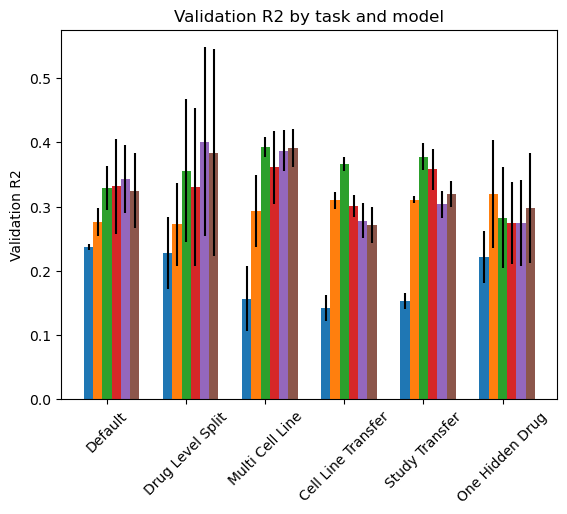

In [26]:
fig, ax = plt.subplots()

width = 0.35  # the width of the bars
labels = ['Default', 'Drug Level Split', 'Multi Cell Line', 'Cell Line Transfer', 'Study Transfer', 'One Hidden Drug']
x = 3*np.arange(len(labels))

rects1 = ax.bar(x - 2*width, svm_means,   width, label='Linear SVM', yerr=svm_stds)
rects2 = ax.bar(x - width,   boost_tree_means, width, label='Boosting Trees', yerr=boost_tree_stds)
rects3 = ax.bar(x,           deep_syn_means, width, label='Deep Synergy', yerr=deep_syn_stds)
rects4 = ax.bar(x + width,   no_permut_means, width, label='Recover (no invariance)', yerr=no_permut_stds)
rects5 = ax.bar(x + 2*width, recover_means, width, label='Recover', yerr=recover_stds)
rects6 = ax.bar(x + 3*width, shuffled_means, width, label='Shuffled', yerr=shuffled_stds)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Validation R2')
ax.set_title('Validation R2 by task and model')
ax.set_xticks(x, labels, rotation=45)
# ax.legend()

plt.show()

In [27]:
res_df_spear_valid = res_df[(res_df["metric"] == "Spear") & (res_df["split"] == "val")]

In [28]:
svm_means = res_df_spear_valid[res_df_spear_valid["model"] == "SVM"]["mean"].astype(float).tolist()
boost_tree_means = res_df_spear_valid[res_df_spear_valid["model"] == "Tree"]["mean"].astype(float).tolist()
deep_syn_means = res_df_spear_valid[res_df_spear_valid["model"] == "deep syn"]["mean"].astype(float).tolist()
no_permut_means = res_df_spear_valid[res_df_spear_valid["model"] == "no permut"]["mean"].astype(float).tolist()
recover_means = res_df_spear_valid[res_df_spear_valid["model"] == "recover"]["mean"].astype(float).tolist()
shuffled_means = res_df_spear_valid[res_df_spear_valid["model"] == "shuffled"]["mean"].astype(float).tolist()

svm_stds = res_df_spear_valid[res_df_spear_valid["model"] == "SVM"]["std"].astype(float).tolist()
boost_tree_stds = res_df_spear_valid[res_df_spear_valid["model"] == "Tree"]["std"].astype(float).tolist()
deep_syn_stds = res_df_spear_valid[res_df_spear_valid["model"] == "deep syn"]["std"].astype(float).tolist()
no_permut_stds = res_df_spear_valid[res_df_spear_valid["model"] == "no permut"]["std"].astype(float).tolist()
recover_stds = res_df_spear_valid[res_df_spear_valid["model"] == "recover"]["std"].astype(float).tolist()
shuffled_stds = res_df_spear_valid[res_df_spear_valid["model"] == "shuffled"]["std"].astype(float).tolist()

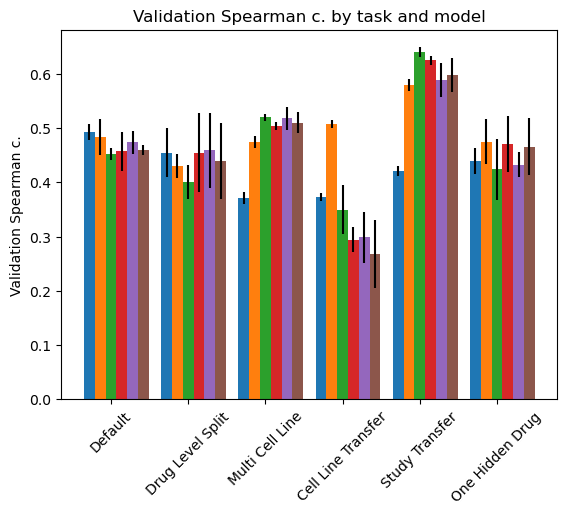

In [29]:
fig, ax = plt.subplots()

width = 0.35  # the width of the bars
labels = ['Default', 'Drug Level Split', 'Multi Cell Line', 'Cell Line Transfer', 'Study Transfer', 'One Hidden Drug']
x = 2.5*np.arange(len(labels))

rects1 = ax.bar(x - 2*width, svm_means,   width, label='Linear SVM', yerr=svm_stds)
rects2 = ax.bar(x - width,   boost_tree_means, width, label='Boosting Trees', yerr=boost_tree_stds)
rects3 = ax.bar(x,           deep_syn_means, width, label='Deep Synergy', yerr=deep_syn_stds)
rects4 = ax.bar(x + width,   no_permut_means, width, label='Recover (no invariance)', yerr=no_permut_stds)
rects5 = ax.bar(x + 2*width, recover_means, width, label='Recover', yerr=recover_stds)
rects6 = ax.bar(x + 3*width, shuffled_means, width, label='Shuffled', yerr=shuffled_stds)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Validation Spearman c.')
ax.set_title('Validation Spearman c. by task and model')
ax.set_xticks(x, labels, rotation=45)
# ax.legend()

plt.show()